# Basic Probability, Conditional Probability and Bayes Formula with Venn Diagrams

Below we draw a universal set $U$ represented by a rectangle, and three sets $A$, $B$, and $C$ represented by three circles. Next one hundred points are randomly and uniformly selected from the rectangle. We compute various probabilities from the generated points.

In [2]:
import numpy as np
import scipy as scp
import matplotlib.pyplot as plt


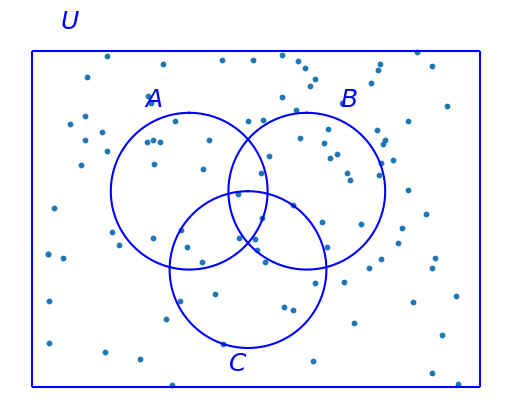

In [4]:
# The lower left and the upper right coordinates of the rectangle representing the universal set:
recLx,recLy,recUx,recUy=0,0,4,3

# The (x,y) coordinates of circles A, B and C, and the length of their radii:
xA,yA,rA,xB,yB,rB,xC,yC,rC=list(.7*np.array([2,2.5,1,3.5,2.5,1,2.75,1.5,1]))

#theta is the array of angles from zero to 2*pi needed to draw the circles
theta=np.linspace(0,2*np.pi, 200)

fig0, ax0 = plt.subplots(1,1)

#Use the coordinates given to draw the rectangle representing the universal set U:
ax0.hlines(y=recUy,xmin=recLx,xmax=recUx,color='blue')
ax0.hlines(y=recLy,xmin=recLx,xmax=recUx,color='blue')
ax0.vlines(x=recLx,ymin=recLy,ymax=recUy,color='blue')
ax0.vlines(x=recUx,ymin=recLy,ymax=recUy,color='blue')
ax0.text(0.25, 3.2, r"$U$", color='blue', fontsize=18)

# Plot the three circles representing events A, B and C:
ax0.plot(rA*np.sin(theta)+xA, rA*np.cos(theta)+yA,color='b')
ax0.plot(rB*np.sin(theta)+xB, rB*np.cos(theta)+yB,color='b')
ax0.plot(rC*np.sin(theta)+xC, rC*np.cos(theta)+yC,color='b')
ax0.text(1,2.5,r"$A$",color='blue', fontsize=18)
ax0.text(2.75,2.5,r"$B$",color='blue', fontsize=18)
ax0.text(1.75,.15,r"$C$",color='blue', fontsize=18)

# Choose N=100 random points and show them on the diagram:
N=100
np.random.seed(20) #Fixing the seed is to get the same "random" numbers every run.\
rx=np.random.uniform(0,4,N)
ry=np.random.uniform(0,3,N)
ax0.scatter(rx,ry, s=10)

ax0.set_aspect("equal") # to make sure the axes are scaled equally:
ax0.set_axis_off()
plt.show()

## A function to check if a point is in a given circle

In [7]:
def inCirc(x,y,xc,yc,r):
    """
    xc,yc: coordinates of a center a circle
    r: radius of a circle
    x, y each arrays where x[i],y[i] is one of the points we wish to see if it's in the circle
    returns: a boolean array where the ith entry is True if (x[i],[y[i]) is in the circle, and
                False otherwise
    """
    return (x-xc)**2 + (y-yc)**2 <= r**2

## Computing probability of each set and their intersections and unions and conditionals

(Note that the `inCirc` function returns a boolean array. Nevertheless, we can do arithmetic with this array. Python treats `True` as one, and `False` as zero.)

In [10]:
pA=np.sum(inCirc(rx,ry,xA,yA,rA))/N
pB=np.sum(inCirc(rx,ry,xB,yB,rB))/N
pC=np.sum(inCirc(rx,ry,xC,yC,rC))/N
print(f"{pA=}, {pB=}, {pC=}")

# Intersections:
pAB=np.sum(inCirc(rx,ry,xA,yA,rA) & inCirc(rx,ry,xB,yB,rB))/N
pAC=np.sum(inCirc(rx,ry,xA,yA,rA) & inCirc(rx,ry,xC,yC,rC))/N
pBC=np.sum(inCirc(rx,ry,xB,yB,rB) & inCirc(rx,ry,xC,yC,rC))/N
pABC=np.sum(inCirc(rx,ry,xA,yA,rA) & inCirc(rx,ry,xB,yB,rB) & inCirc(rx,ry,xC,yC,rC))/N

print(f"{pAB=}, {pAC=}, {pBC=}, {pABC=}")

# Unions
pAorB=np.sum(inCirc(rx,ry,xA,yA,rA) | inCirc(rx,ry,xB,yB,rB))/N
pAorC=np.sum(inCirc(rx,ry,xA,yA,rA) | inCirc(rx,ry,xC,yC,rC))/N
pBorC=np.sum(inCirc(rx,ry,xB,yB,rB) | inCirc(rx,ry,xC,yC,rC))/N
pAorBorC=np.sum(inCirc(rx,ry,xA,yA,rA) | inCirc(rx,ry,xB,yB,rB) | inCirc(rx,ry,xC,yC,rC))/N

print(f"{pAorB=}, {pAorC=}, {pBorC=}, {pAorBorC=}")

# Some conditionals:
pAgivenB=pAB/pB
pBgivenA=pAB/pA
pAgivenC=pAC/pC
pBgivenC=pBC/pC
print(f"{pAgivenB=:.3f}, {pBgivenA=:.3f}, {pAgivenC=:.3f}, {pBgivenC=:.3f}")

pA=0.15, pB=0.18, pC=0.14
pAB=0.03, pAC=0.06, pBC=0.04, pABC=0.02
pAorB=0.3, pAorC=0.23, pBorC=0.28, pAorBorC=0.36
pAgivenB=0.167, pBgivenA=0.200, pAgivenC=0.429, pBgivenC=0.286


## Testing Bayes Formula:
We can now test Bayes formula for conditional probabilities:

In [13]:
print("Testing Bayes Formula:")
print(f"{pAgivenB = :0.3f}, {pBgivenA * pA / pB= :0.3f}")

Testing Bayes Formula:
pAgivenB = 0.167, pBgivenA * pA / pB= 0.167


# Visualizing the Central Limit Theorem
Below we draw samples from different probability distributions, both discrete and continuous, and calculate their means. We then repeat this process many times and get a set of many means from the distribution samples. Next we plot the histogram of these means. Regardless of how different the underlying distributions are from the normal distributions, the means tend to follow the normal distribution approximately. Furthermore, the larger the samples are, the closer the means behavior is to the normal distribution.

Below, we draw from the *Bernoulli distribution* which can take only zero or one values. The first one is Bernoulli with equal probability, and next Bernoulli with 0.2/08 probability. For the last example we draw from the continuous *Beta distribution* with values between zero and one, and parameters $\alpha, \beta$. 

Note that the means of samples of size five are not necessarily that close to the normal distribution. However, with 100 samples we get closer, and with 10,000 samples we get much closer to the normal distribution.

First, we draw the samples (this may take a while to complete):

In [16]:
n1, n2, n3, m=5, 100, 100000,10000
p1,p2,alpha,beta = 0.5, 0.2, 0.2, 0.8

# Generate Bernoulli random variables with p=0.5 (we use np.random.randint to choose zero or one:
means01=[np.mean(np.random.randint(0,2,n1)) for _ in range(m)] # Bernoulli dist. with p=0.5
means02=[np.mean(np.random.randint(0,2,n2)) for _ in range(m)] # Bernoulli dist. with p=0.5
means03=[np.mean(np.random.randint(0,2,n3)) for _ in range(m)] # Bernoulli dist. with p=0.5

# Generate Bernoulli random variables with p=0.2:
means11=[np.mean(np.random.uniform(0,1,n1)<p2) for _ in range(m)] # Bernoulli dist.with p=p2
means12=[np.mean(np.random.uniform(0,1,n2)<p2) for _ in range(m)] # Bernoulli dist.with p=p2
means13=[np.mean(np.random.uniform(0,1,n3)<p2) for _ in range(m)] # Bernoulli dist.with p=p2

# Generate continuous Beta random variables between zero and one with parameters alpha and beta:
means21=[np.mean(np.random.beta(alpha,beta,n1)) for _ in range(m)] # Beta dist with parameters alpha,beta
means22=[np.mean(np.random.beta(alpha,beta,n2)) for _ in range(m)] # Beta dist with parameters alpha,beta
means23=[np.mean(np.random.beta(alpha,beta,n3)) for _ in range(m)] # Beta dist with parameters alpha,beta

Next, we plot the histogram of the means of samples. We use $\sqrt{n}$ bins for $n$ samples. The histogram roughly outlines the shape of the pdf/pmf of the distribution from the samples. Note that for all example when the number of samples is five, the histogram does not necessarily look like the Bell curve of the normal distribution. But for 100 samples it gets closer, and for 100,000 samples it gets much closer:

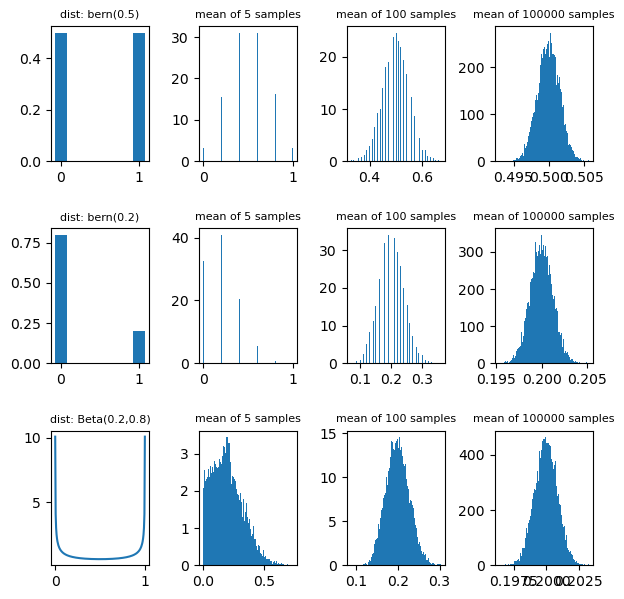

In [19]:
na,ma=3,4 # number of rows and columns of plot grid
fig1, ax1 = plt.subplots(na,ma)
fig1.set_size_inches(7,7)

ax1[0,0].bar([0,1],[0.5,0.5],width=0.15)
ax1[0,1].hist(means01, bins=int(np.sqrt(m)), density=True, stacked=True)
ax1[0,2].hist(means02, bins=int(np.sqrt(m)), density=True, stacked=True)
ax1[0,3].hist(means03, bins=int(np.sqrt(m)), density=True, stacked=True)
ax1[0,0].set_title('dist: bern(0.5)',size=8)
ax1[0,1].set_title(f'mean of {n1} samples',size=8)
ax1[0,2].set_title(f'mean of {n2} samples',size=8)
ax1[0,3].set_title(f'mean of {n3} samples',size=8)

ax1[1,0].bar([0,1],[1-p2,p2],width=0.15)
ax1[1,1].hist(means11, bins=int(np.sqrt(m)), density=True, stacked=True)
ax1[1,2].hist(means12, bins=int(np.sqrt(m)), density=True, stacked=True)
ax1[1,3].hist(means13, bins=int(np.sqrt(m)), density=True, stacked=True)
ax1[1,0].set_title(f'dist: bern({p2:.1f})',size=8)
ax1[1,1].set_title(f'mean of {n1} samples',size=8)
ax1[1,2].set_title(f'mean of {n2} samples',size=8)
ax1[1,3].set_title(f'mean of {n3} samples',size=8)

t=np.linspace(0.001,.999,200)
ax1[2,0].plot(t,scp.stats.beta.pdf(t,0.5,0.5))
ax1[2,1].hist(means21, bins=int(np.sqrt(m)), density=True, stacked=True)
ax1[2,2].hist(means22, bins=int(np.sqrt(m)), density=True, stacked=True)
ax1[2,3].hist(means23, bins=int(np.sqrt(m)), density=True, stacked=True)
ax1[2,0].set_title(f'dist: Beta({alpha:.1},{beta:.1f})',size=8)
ax1[2,1].set_title(f'mean of {n1} samples',size=8)
ax1[2,2].set_title(f'mean of {n2} samples',size=8)
ax1[2,3].set_title(f'mean of {n3} samples',size=8)

plt.subplots_adjust(hspace=0.5)
plt.subplots_adjust(wspace=0.5)

plt.show()

# Discrete Joint Distributions
## Computing marginal and conditional distributions

We work on an example where three discrete random variables $X_0, X_1$, and $X_2$ are given along with a three-dimensional table containing their joint mass distribution. We then compute some examples of marginal and conditional distributions. Next, we compute mean and variance (marginal and conditional) values of some combinations of these variables.

Suppose:
- $X_0$ can attain values: $\{2,3,5\}$,
- $X_1$ can attain values: $\{-1,1,3,4\}$, and 
- $X_2$ can attain values: $\{0,1\}$.

For this example, we pick the joint probability distribution randomly selecting 24 ($=3\times 4\times 2$) random positive integers. We then divide these integers by their sum  to get a proper probability distribution:

In [22]:
import numpy as np
import matplotlib.pyplot as plt


X0Vals=np.array((2,3,5)) # values that X1 can attain
X1Vals=np.array((-1,1,3,4)) # values that X2 can attain
X2Vals=np.array((0,1)) #values that X3 can attain

np.random.seed(12) # To get the same result each time fix the seed

# The 3 x 4 x 2 dimensional array XProbs will contain the joint pmf of X0, X1, X2:
XProbs=np.random.randint(1,26, (3,4,2)) # randomly select integers in an array of shape 3 x 4 x 2
XProbs=XProbs/np.sum(XProbs) # normalize to get a proper probability distribution

print(f"Complete joint distribution X0, X1, X2: \nthe first array is for X0=2, the second for X0=3, and the third for X0=5:\n{XProbs}")

Complete joint distribution X0, X1, X2: 
the first array is for X0=2, the second for X0=3, and the third for X0=5:
[[[0.04123711 0.02405498]
  [0.06185567 0.01030928]
  [0.0137457  0.0137457 ]
  [0.04467354 0.05841924]]

 [[0.0790378  0.06185567]
  [0.07216495 0.02061856]
  [0.04810997 0.01030928]
  [0.04123711 0.0790378 ]]

 [[0.03780069 0.00343643]
  [0.07560137 0.03092784]
  [0.04467354 0.04810997]
  [0.0652921  0.0137457 ]]]


# Marginal distributions
The joint distribution of the random vector $(X_0,X_1,X_2)$ is set. Suppose we wish to know the joint distribution of $X_0,X_1$ only. Then we look at all possible values that the pair $(X_0,X_1)$ can attain, and sum over all joint probabilities with $X_3$, that is:

$$
P(X_0=a,X_1=b)= \sum_{c} P(X_0=a,X_1=b,X_2=c)
$$

Here, $a$ represents a value that $X_0$ can attain (i.e. $a\in\{2,3,5\}$). Likewise, $b$ represents a value that $X_1$ can attain (i.e. $b\in\{-1,1,3,4\}$.) For computing the joint marginal distribution of $X_0,X_1$ we must sum over all possible values $c$ that $X_3$ can attain, (i.e. $c\in\{0,1\}$.) This process is sometimes called `marginalizing` the $X_3$ variable. We can also marginalize more than one variable. For instance the marginal distribution of $X_1$ is computed by marginalizing $X_0$, and $X_2$, that is for each value that $X_1$ can attain, sum all pairs of probabilities for $X_0$ and $X_2$:

$$
P(X_1=a)=\sum_i \sum_j P(X_0=a_i,X_1=a,X_3=c_j)
$$

In Python implementation note how we take advantage of the numpy `np.sum` function along with the `axis` parameter. Using these two tools makes computing marginal; distributions very easy and straightforward. The rule is 

*Sum along the axes whose corresponding variables are being marginalized.*

In [25]:
#Computing marginal distributions of pairs of variables:
margX0X1 = np.sum(XProbs, axis=2)
margX0X2 = np.sum(XProbs, axis=1)
margX1X2 = np.sum(XProbs, axis=0)
print(f"X0 and X1 marginal dist:\n{margX0X1}\n\n")
print(f"X0 and X2 marginal dist:\n{margX0X2}\n\n")
print(f"X1 and X2 marginal dist:\n{margX1X2}\n")

#Computing marginal distributions of each variable:
margX0 = np.sum(XProbs, axis=(1,2))
margX1 = np.sum(XProbs, axis=(0,2))
margX2 = np.sum(XProbs, axis=(0,1))
print(f"X0 marginal dist:\n{margX0}\n\n")
print(f"X1 marginal dist:\n{margX1}\n\n")
print(f"X2 marginal dist:\n{margX2}\n")

print(f"For sanity check: sum over margX0: {np.sum(margX0):3.2f}")
print(f"For sanity check: sum over margX1: {np.sum(margX1):3.2f}")
print(f"For sanity check: sum over margX2: {np.sum(margX2):3.2f}")
print(f"For sanity check: sum over margX0X1: {np.sum(margX0X1):3.2f}")
print(f"For sanity check: sum over margX0X2: {np.sum(margX0X2):3.2f}")
print(f"For sanity check: sum over margX1X2: {np.sum(margX1X2):3.2f}")


X0 and X1 marginal dist:
[[0.0652921  0.07216495 0.02749141 0.10309278]
 [0.14089347 0.09278351 0.05841924 0.12027491]
 [0.04123711 0.10652921 0.09278351 0.0790378 ]]


X0 and X2 marginal dist:
[[0.16151203 0.10652921]
 [0.24054983 0.17182131]
 [0.2233677  0.09621993]]


X1 and X2 marginal dist:
[[0.1580756  0.08934708]
 [0.20962199 0.06185567]
 [0.10652921 0.07216495]
 [0.15120275 0.15120275]]

X0 marginal dist:
[0.26804124 0.41237113 0.31958763]


X1 marginal dist:
[0.24742268 0.27147766 0.17869416 0.3024055 ]


X2 marginal dist:
[0.62542955 0.37457045]

For sanity check: sum over margX0: 1.00
For sanity check: sum over margX1: 1.00
For sanity check: sum over margX2: 1.00
For sanity check: sum over margX0X1: 1.00
For sanity check: sum over margX0X2: 1.00
For sanity check: sum over margX1X2: 1.00


# Plotting the marginal distributions

We show the marginal distribution of $X_0$ and $X_1$ using 3D bar charts:

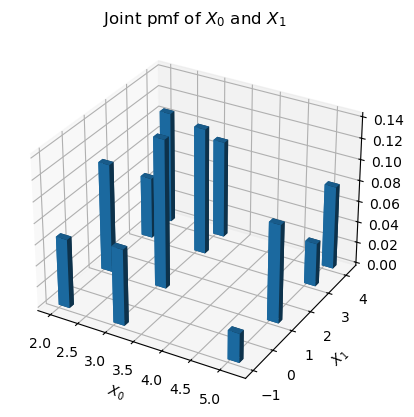

In [28]:
#import ipympl #for making it easy to manipulate 3D plots 
#%matplotlib widget
#import ipympl

fig2 = plt.figure()
sub00 = fig2.add_subplot(1,1,1,projection="3d")
X0,X1 = np.meshgrid(X0Vals,X1Vals)
sub00.bar3d(X0.ravel(),X1.ravel(),0, 0.2,0.2,margX0X1.ravel())
plt.title(r"Joint pmf of $X_0$ and $X_1$")
plt.xlabel(r"$X_0$")
plt.ylabel(r"$X_1$")
plt.show()

And now we plot the marginal distribution of $X_1$ alone using 2D bar charts:

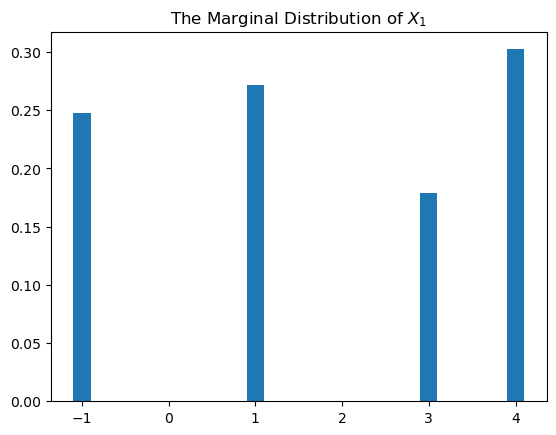

In [33]:
fig3 = plt.figure()
sub01 = fig3.add_subplot(111)
sub01.bar(X1Vals,margX1,width=0.2)
#sub01.stem(X1Vals,margX1, "r")
plt.title(r"The Marginal Distribution of $X_1$")
plt.show()

# Computing Conditional Distributions
Conditional distributions are computed by taking the joint distribution, and dividing by the marginal distribution of the random variable being conditioned on. For example,

$$
f_{X_0,X_1\mid X_2}(t_1,t_2\mid X_2=0) = \frac{f(t_0,t_1,t_2=0)}{f_{X_0}(t_2=0)}
$$

where $t_2=0$ means that for variable $t_2$ plug in the constant 0.

To compute the conditional distribution using numpy we need to look at the the row or plate of the table corresponding to the value being conditioned on. For example, if we are conditioning on $X_2=0$, we need to look at (here $3\times 4$ table) corresponding to $X_2=2$. In Python, using `:` selects everything in the corresponding axis. For example, `X[:,:,0]` indicates the 2D table where the third index is fixed at 0, and the we select all values of $X_0$ and $X_1$ with $X_2=0$. For the denominator $f_{X_0}(t_2=0)$, since the marginal distribution of $X_2$ is already computed, we need only to look at the entry corresponding to 0, to find the value of it probability (that is pmf at 0).

In [44]:
# Computing conditional distribution X0,X1 | X2=0:
condX0X1givenX2eq0 = XProbs[:,:,0]/margX2[0]
print(f"conditional distribution of X0,X1 | X2=0:\n {condX0X1givenX2eq0}\n")
print(f"Sanity check for X0,X1|X2=0: {np.sum(condX0X1givenX2eq0):3.2f}\n")

condX1GivenX0eq2X2eq1 = XProbs[0,:,1]/margX0X2[0,1]
print(f"Conditional distribution of X1 | X0=2,X2=1: {condX1GivenX0eq2X2eq1}")
print(f"Sanity check for X1|X0=2,X2=1: {np.sum(condX1GivenX0eq2X2eq1):3.2f}")

conditional distribution of X0,X1 | X2=0:
 [[0.06593407 0.0989011  0.02197802 0.07142857]
 [0.12637363 0.11538462 0.07692308 0.06593407]
 [0.06043956 0.12087912 0.07142857 0.1043956 ]]

Sanity check for X0,X1|X2=0: 1.00

Conditional distribution of X1 | X0=2,X2=1: [0.22580645 0.09677419 0.12903226 0.5483871 ]
Sanity check for X1|X0=2,X2=1: 1.00


# Computing Mean and Variance of Discrete Distributions
Remember that the mean of a (discrete) distribution with pmf $f_X(t)$ where $X$ can attain values $\{t_1,t_2,\dots,t_k\}$ is given by:

$$
\mathbb{E}(X) = t_1 f_X(t_1) + t_2 f_X(t_2) + \dots + f_k f_X(t_k)
$$

And the variance of $X$ given by:

$$
\text{Var}(X) = \bigl(t_1-\mathbb{E}(X)\bigr)^2f_X(t_1) + \dots + \bigl(t_k-\mathbb{E}(X)\bigr)^2f_X)t_k
$$

Finally, the *covariance* of $X_0, X_1$, where $X_0$ can attain values $\{s_1,\dots, s_m\}$ and $X_1$ can attain values in $\{t_1, \dots, t_n\}$ can be computed by a double sum as follows:

$$
\begin{aligned}
\text{Cov}(X_0,X_1) &= \bigl(s_1-\mathbb{E}(X_0)\bigr)\bigl(t_1-\mathbb{E}(X_1)\bigr)f_{X_0,X_1}(s_1,t_1) + \dots \bigl(s_m-\mathbb{E}(X_0)\bigr)\bigl(t_n-\mathbb{X_1})\bigr)f_{X_0,X_1}(s_m,t_n)\\
 &= \sum_{i=1}^m\sum_{j=1}^n\bigl(s_i-\mathbb{E}(X_0)\bigr)\bigl(t_j-\mathbb{E}(X_1)\bigr)
\end{aligned}
$$

Thus, mean, variance and covariance are expressed as sum of products of vector/array of values and vector/array of probability distributions. In numpy the operation `@` is a matrix-matrix or a matrix-vector product that can be used to find sum of products. 

For the covariance, we use the *outer product* of vectors $\bigl(s_1-\mathbb{E}(X_0), \dots, s_m-\mathbb{E}(X_0)\bigr)$ and $\bigl(t_1-\mathbb{E}(X_1), \dots, t_n-\mathbb{E}(X_1)\bigr)$. The outer product produces an $m\times n$ matrix whose $i,j$ entry is $\bigl((s_i-\mathbb{E}(X_0)\bigr)\bigl(t_j-\mathbb{E}(X_1)\bigr)$. To compute covariance, this matrix is component-wise multiplied by the matrix of joint distribution of $X_0,X_1$ and then the entries of the product are summed to get the covariance. 

In [83]:
meanX0 = margX0 @ X0Vals # "@" is the matrix product which is a number here
meanX1 = margX1 @ X1Vals
print(f"mean of X0: {meanX0:.2f},\nmean of X1: {meanX1:.2f}") 
varX0 = margX0 @ (X0Vals-meanX0)**2
print(f"variance of X0: {varX0:3.2f}")
print(f"conditional mean of X1 | X0=2,X2=1: {condX1GivenX0eq2X2eq1 @ X1Vals:.2f}")
covX0X1=np.sum(margX0X1 * np.outer((X0Vals-meanX0),(X1Vals-meanX1)))
print(f"Covariance of X0 and X1: {covX0X1:.3f}")

mean of X0: 3.37,
mean of X1: 1.77
variance of X0: 1.41
conditional mean of X1 | X0=2,X2=1: 2.45
Covariance of X0 and X1: 0.161


# Plotting the joint distribution of Continuous Variables Using Surface and Contours

We consider the joint distribution of people's heights and weights. Assume that the joint distribution is normal with mean vector $\boldsymbol{\mu}=(\mu_1,\mu_2)=(\text{weight(kg), height(cm)})$. Both surface and the contour representations are shown below:

/tmp/ipykernel_923524/1958267094.py:31: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig4.show()
/tmp/ipykernel_923524/1958267094.py:40: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig5.show()


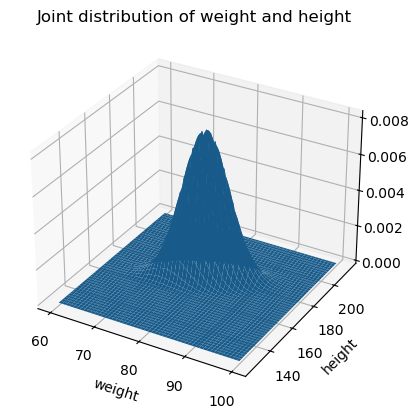

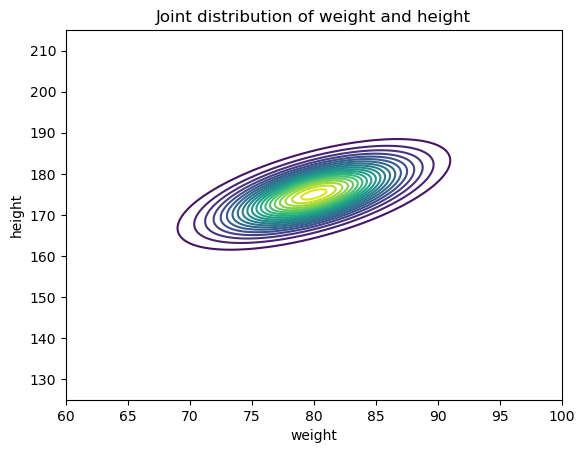

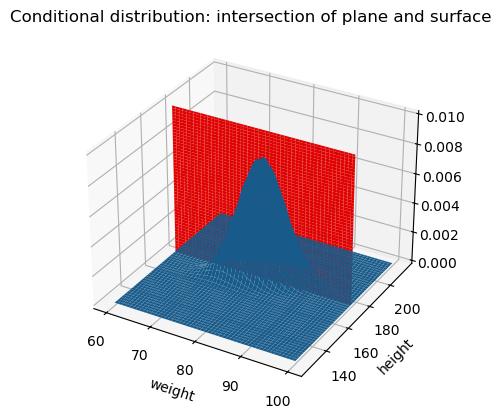

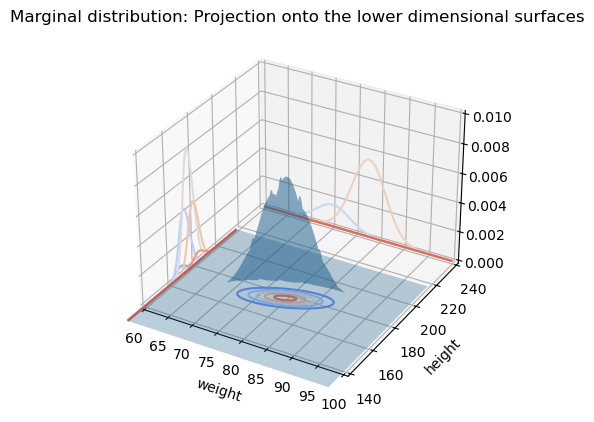

In [57]:
from scipy import stats
from mpl_toolkits.mplot3d import Axes3D #for 3D plots
#from mpl_toolkits.mplot3d import axes3d
from matplotlib import cm

#%matplotlib


# Drawing surface and contours of a bivariate normal distribution
S=np.array([[20,15],[15,30]]) #Covariance matrix
mu=[80,175] #mean vector
x=np.linspace(60,100,200) # generate x for weight
y=np.linspace(125,215,200) #generate y for height

# meshgrid creates two matrices out of two vectors: 
# the left repeats x row after row
# the second repeats y column after column

X,Y=np.meshgrid(x,y)  

# vectorize allows a function to be applied component-wise to
# a vector, matrix, or higher dimensional tensors 
f=np.vectorize(lambda x,y: stats.multivariate_normal.pdf([x,y],mu,S))
Z=f(X,Y)
fig4=plt.figure()
sub=fig4.add_subplot(1,1,1,projection="3d")
sub.plot_surface(X,Y,Z) #
plt.xlabel("weight")
plt.ylabel("height")
plt.title("Joint distribution of weight and height")
fig4.show()
### contour plot
fig5=plt.figure()
sub=fig5.add_subplot(1,1,1)
sub.contour(X,Y,Z,levels=20) 
plt.xlabel("weight")
plt.ylabel("height")
#plt.zlabel("pdf")
plt.title("Joint distribution of weight and height")
fig5.show()

### Plot of the conditional distribution given Y

xs = np.linspace(60,100,200)
zs = np.linspace(0, .01, 200)

# Study these two lines. Here is how you create a plane 
# parallel to x-z plane:
X1, Z1 = np.meshgrid(xs, zs)
Y1 = 175

fig6 = plt.figure()
ax = fig6.add_subplot(111, projection='3d')
ax.plot_surface(X,Y,Z)
ax.plot_surface(X1, Y1, Z1,color="red")
plt.xlabel("weight")
plt.ylabel("height")
#plt.zlabel("pdf")
plt.title("Conditional distribution: intersection of plane and surface")
plt.show()

### Plot of the marginal distributions with respect to X and with respect to Y
xrange,yrange,zrange=[60,100],[140,240],[0,0.01]
fig7 = plt.figure()
ax7 = fig7.add_subplot(projection='3d')
#X, Y, Z = axes3d.get_test_data(0.05)
ax7.plot_surface(X, Y, Z, rstride=8, cstride=8, alpha=0.3)
cset = ax7.contour(X, Y, Z, zdir='z', offset=zrange[0], cmap=cm.coolwarm)
cset = ax7.contour(X, Y, Z, zdir='x', offset=xrange[0], cmap=cm.coolwarm)
cset = ax7.contour(X, Y, Z, zdir='y', offset=yrange[1], cmap=cm.coolwarm)
#cset = ax1.contour(X, Y, Z, zdir='z',  cmap=cm.coolwarm)
#cset = ax1.contour(X, Y, Z, zdir='x',  cmap=cm.coolwarm)
#cset = ax1.contour(X, Y, Z, zdir='y',  cmap=cm.coolwarm)

ax7.set_xlim(xrange[0], xrange[1])
ax7.set_ylim(yrange[0], yrange[1])
ax7.set_zlim(zrange[0], zrange[1])
plt.xlabel("weight")
plt.ylabel("height")
#plt.zlabel("pdf")
plt.title("Marginal distribution: Projection onto the lower dimensional surfaces")

plt.show()
